In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
    %tensorflow_version 2.x  # Colab only.
except Exception:
    pass

import tensorflow as tf
print(tf.__version__)

2.3.1


In [2]:
# More imports
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)
x_test.shape: (60000, 28, 28)


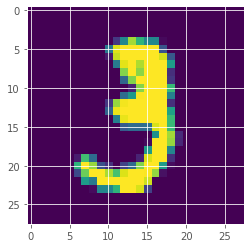

In [8]:
plt.imshow(x_train[10])

In [9]:
# Build the model (LSTM)
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.3408 - accuracy: 0.8899 - val_loss: 0.1751 - val_accuracy: 0.9471
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1004 - accuracy: 0.9696 - val_loss: 0.0889 - val_accuracy: 0.9722
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0701 - accuracy: 0.9789 - val_loss: 0.0599 - val_accuracy: 0.9823
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0533 - accuracy: 0.9837 - val_loss: 0.0617 - val_accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0457 - accuracy: 0.9863 - val_loss: 0.0541 - val_accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0368 - accuracy: 0.9890 - val_loss: 0.0531 - val_accuracy: 0.9840
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0319 - accuracy: 0.9898 - val_loss: 0.0467 -

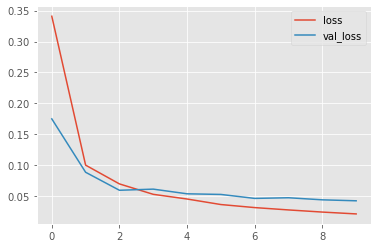

In [10]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

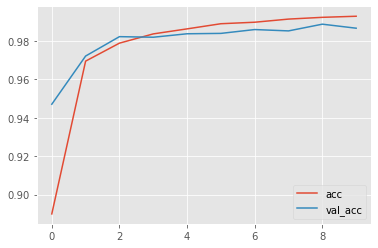

In [11]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 975    0    0    0    1    0    2    1    1    0]
 [   0 1129    0    1    1    0    2    2    0    0]
 [   0    1 1023    2    1    0    0    4    0    1]
 [   0    0    2 1003    0    4    0    1    0    0]
 [   0    0    1    0  963    1    1    3    2   11]
 [   0    1    0    7    0  872   11    0    1    0]
 [   2    2    2    1   12    2  936    0    1    0]
 [   0    1    9    2    0    0    0 1013    1    2]
 [   0    0    3    8    1    7    1    1  950    3]
 [   0    0    0    0    1    4    0    0    1 1003]]


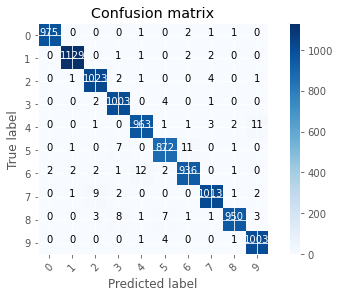

In [13]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
                 horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

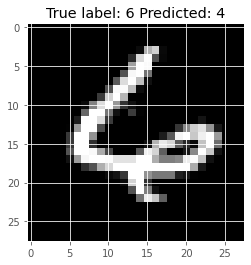

In [14]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));